<a href="https://colab.research.google.com/github/Jonny-T87/ML-Projects/blob/main/SineNetworkModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN


##Creating Data

In [36]:
#setting up random seed for reproduction
np.random.seed(0)

In [37]:
#creating a range of int values
t = np.arange(0,1500)
t

array([   0,    1,    2, ..., 1497, 1498, 1499])

In [38]:
#creating sine for t
x = np.sin(0.02 * t)
x

array([ 0.        ,  0.01999867,  0.03998933, ..., -0.99550324,
       -0.99340972, -0.99091885])

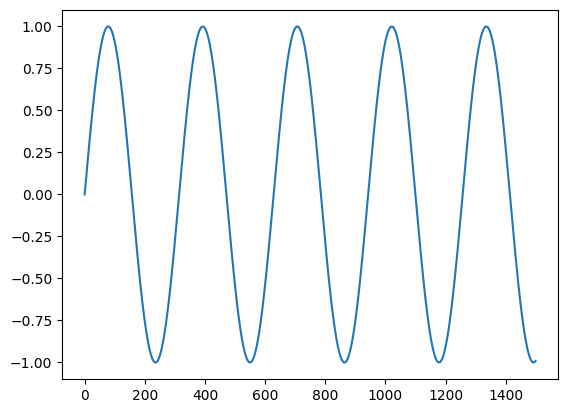

In [39]:
#check x is a sine wave
plt.plot(x)
plt.show()

In [45]:
#creating sine for t with noise added
x_noise = np.sin(0.02 * t) + np.random.uniform(low=-1, high=1,size=(1500,))
x_noise

array([-0.17207501,  0.27923527,  0.59715786, ..., -0.79567421,
       -1.54101519, -1.16465819])

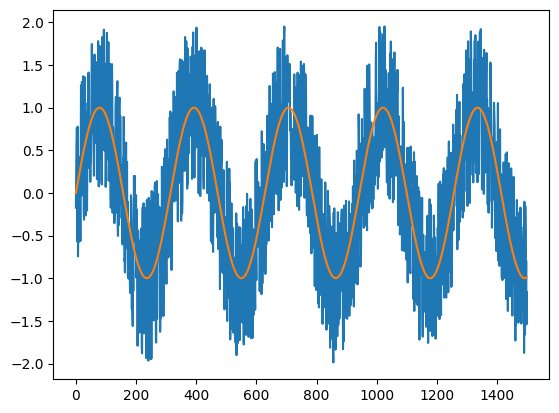

In [46]:
#check x2 is a sine wave with noise w/ sine
plt.plot(x_noise)
plt.plot(x)
plt.show()

In [62]:
#creating Xtrain and Ytrain and reshaping for model
#Xtrain = x.reshape(1500,1,1)
#Ytrain = x_noise.reshape(1500,1,1)


In [70]:
#making Xtrain and Ytrain sets from above and reshaping for model
Xtrain = x[:-100].reshape(1400,1,1)
Ytrain = x_noise[:-100].reshape(1400,1,1)
Xtest = x[-100:].reshape(100,1,1)
Ytest = x_noise[-100:].reshape(100,1,1)

In [71]:
Xtrain.shape

(1400, 1, 1)

##Creating Network Model

In [75]:
#Creating model w/ activation tanh and optimizer adam
model = Sequential()
model.add(SimpleRNN(units=1, activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [76]:
#running model w/ 200 epochs
history = model.fit(Xtrain, Ytrain, epochs=200, batch_size=16, verbose=2)

Epoch 1/200
88/88 - 2s - loss: 1.7397 - 2s/epoch - 17ms/step
Epoch 2/200
88/88 - 0s - loss: 1.5546 - 163ms/epoch - 2ms/step
Epoch 3/200
88/88 - 0s - loss: 1.4026 - 201ms/epoch - 2ms/step
Epoch 4/200
88/88 - 0s - loss: 1.2768 - 174ms/epoch - 2ms/step
Epoch 5/200
88/88 - 0s - loss: 1.1735 - 202ms/epoch - 2ms/step
Epoch 6/200
88/88 - 0s - loss: 1.0888 - 230ms/epoch - 3ms/step
Epoch 7/200
88/88 - 0s - loss: 1.0189 - 203ms/epoch - 2ms/step
Epoch 8/200
88/88 - 0s - loss: 0.9610 - 172ms/epoch - 2ms/step
Epoch 9/200
88/88 - 0s - loss: 0.9120 - 176ms/epoch - 2ms/step
Epoch 10/200
88/88 - 0s - loss: 0.8697 - 198ms/epoch - 2ms/step
Epoch 11/200
88/88 - 0s - loss: 0.8318 - 199ms/epoch - 2ms/step
Epoch 12/200
88/88 - 0s - loss: 0.7959 - 183ms/epoch - 2ms/step
Epoch 13/200
88/88 - 0s - loss: 0.7604 - 184ms/epoch - 2ms/step
Epoch 14/200
88/88 - 0s - loss: 0.7232 - 170ms/epoch - 2ms/step
Epoch 15/200
88/88 - 0s - loss: 0.6830 - 173ms/epoch - 2ms/step
Epoch 16/200
88/88 - 0s - loss: 0.6398 - 168ms/epoc

##Model Results

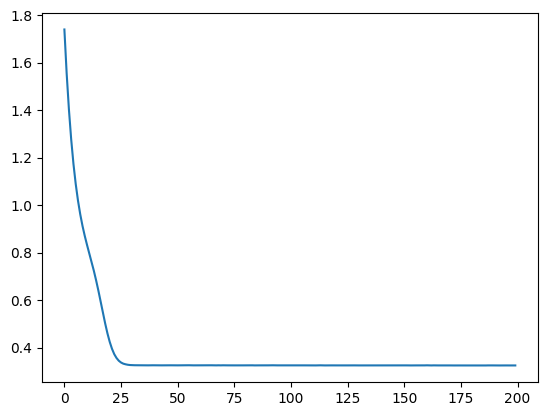

In [77]:
#plotting loss history of model
loss = history.history['loss']
plt.plot(loss)
plt.show()
#model does not get better after 25 epochs

In [78]:
#model to predict training set
train_predict = model.predict(Xtrain)
test_predict = model.predict(Xtest)

4/4 [==============================] - 0s 3ms/step


In [79]:
#combining predictions to plot
predictions = np.concatenate((train_predict, test_predict), axis=0)

##Final Plot

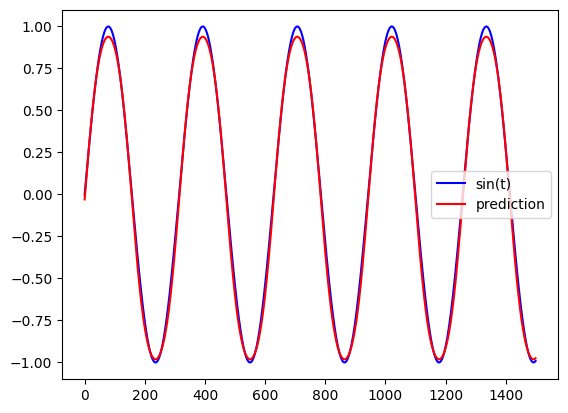

In [82]:
#plotting actual data and predictions of model
plt.plot(x, color='blue', label='sin(t)')
plt.plot(predictions, color='red', label='prediction')
plt.legend()
plt.show()